# smile_metric()

Note that "column number" is with respect to the image from the perspective of the camera, and therefore these methods only apply to data that has not been georeferenced.

Loading in image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from spectral import *

import hyperquest

# Example usage
hdr_path = '/Users/brent/Documents/DEM_DATA/PRISMA/DENALI/PRS_20210321213856_20210321213901_0001/PRS_20210321213856_20210321213901_0001_rdn.hdr'

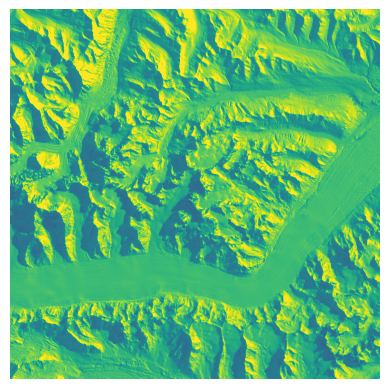

In [2]:
# Load raster
img_path = hyperquest.get_img_path_from_hdr(hdr_path)
array = np.array(envi.open(hdr_path, img_path).load(), dtype=np.float64)

plt.imshow(array[:,:,1], vmin=0, vmax=35)
plt.axis('off')
plt.show()

I can't figure out a good way to show on this notebook, but it is actually flipped 90degrees (there are some striping present see below).

So to deal with this, numpy.rot90() can be used to rotate while preserving the data. This happens in the method.

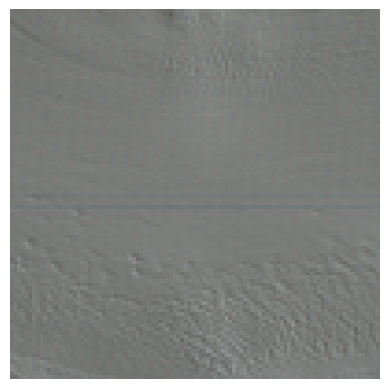

In [30]:
plt.imshow(array[700:800,:100,0:3]/50)
plt.axis('off')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/hyperquest/smile.py:83: RuntimeWarning: Mean of empty slice
  o2_mean = np.nanmean(o2_dband, axis=0)
/opt/homebrew/lib/python3.11/site-packages/hyperquest/smile.py:84: RuntimeWarning: Mean of empty slice
  o2_std = np.nanmean(o2_dband, axis=0)
/opt/homebrew/lib/python3.11/site-packages/hyperquest/smile.py:94: RuntimeWarning: Mean of empty slice
  co2_mean = np.nanmean(co2_dband, axis=0)
/opt/homebrew/lib/python3.11/site-packages/hyperquest/smile.py:95: RuntimeWarning: Mean of empty slice
  co2_std = np.nanmean(co2_dband, axis=0)


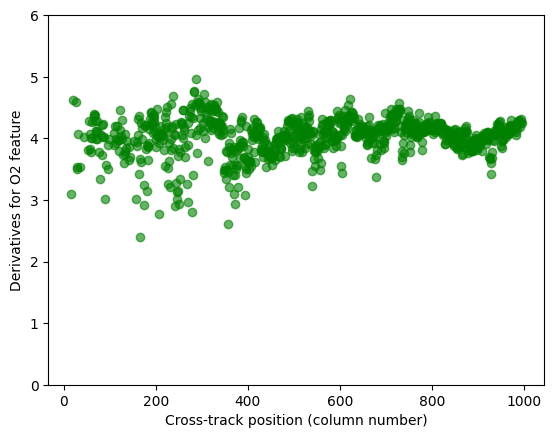

In [34]:
# running smile_metric()
o2_mean, co2_mean, o2_std, co2_std = hyperquest.smile_metric(hdr_path, rotate=90)

# column numbers can be made using the length of the result here
column_numbers = range(0, len(o2_mean))

# plotting
plt.scatter(column_numbers, o2_mean, color='green', alpha=0.6)
plt.ylabel('Derivatives for O2 feature')
plt.xlabel('Cross-track position (column number)')
plt.ylim(0,6)
plt.show()

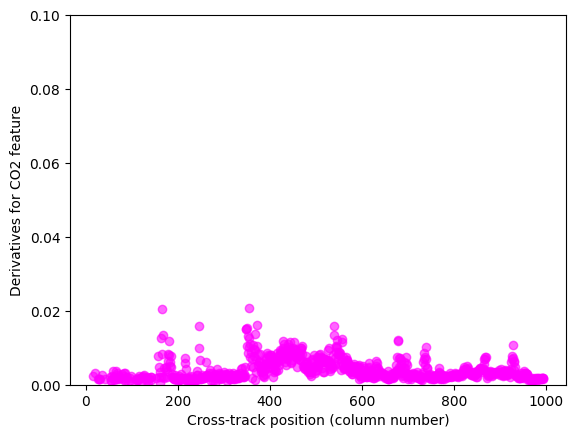

In [35]:
# plotting co2 now
plt.scatter(column_numbers, co2_mean, color='magenta', alpha=0.6)
plt.ylabel('Derivatives for CO2 feature')
plt.xlabel('Cross-track position (column number)')
plt.ylim(0, 0.1)
plt.show()

# nodd_o2a()

TODO:

In [ ]:
path_to_rtm_output_csv = ""

cwl, fwhm, sensor_band, sensor_fwhm = hyperquest.nodd_o2a(hdr_path,
                                                          rotate = 90, 
                                                          path_to_rtm_output_csv = path_to_rtm_output_csv, 
                                                          rho_s=0.15, # can be assumed , exact reflectance is not needed in NODD
                                                          ncpus=8,
                                                          mask_waterbodies=True)

# outputs
# CWL: array of optimal CWL at sensor_band
# FWHM: array of optimal FWHM at sensor band
# sensor_band: value given in hdr for CWL closest to O2-A.
# sensor_fwhm: value given in hdr for FWHM closest to O2-A.


In [ ]:
# means
mean_cwl = np.nanmean(cwl)
mean_fwhm = np.nanmean(fwhm)

# plot code
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

ax[0].scatter(column_numbers, cwl, color='k', alpha=0.3)
ax[0].axhline(mean_cwl, color='r', linestyle='--')
ax[0].text(0, 759.4, f'Mean: {mean_cwl:.2f} nm', color='r') 
ax[0].set_title(f'hdr wavelength: {sensor_band} nm')
ax[0].set_xlabel('')
ax[0].set_ylabel('Center Wavelength [nm]')

ax[1].scatter(column_numbers, fwhm, color='k', alpha=0.3)
ax[1].axhline(mean_fwhm, color='r', linestyle='--')
ax[1].text(0, 0.1, f'Mean: {mean_fwhm:.2f} nm', color='r') 
ax[1].set_title(f'hdr FWHM: {sensor_fwhm} nm')
ax[1].set_xlabel('Cross-track position (column number)')
ax[1].set_ylabel('FWHM [nm]')
ax[1].set_ylim(0,20)
plt.tight_layout()
plt.show()